# HR Analytics

A training institute which conducts training for analytics/ data science wants to expand their business to manpower recruitment (data science only) as well. 
 
Company gets large number of signups for their trainings. Now, company wants to connect these enrollees with their clients who are looking to hire employees working in the same domain. Before that, it is important to know which of these candidates are really looking for a new employment. They have student information related to demographics, education, experience and features related to training as well.
 
To understand the factors that lead a person to look for a job change, the agency wants you to design a model that uses the current credentials/demographics/experience to predict the probability of an enrollee to look for a new job.

https://datahack.analyticsvidhya.com/contest/janatahack-hr-analytics/True/#ProblemStatement


### <b>Data Dictionary </b>

enrollee_id- Unique ID for enrollee

city - City code

city_development_index - Developement index of the city (scaled)

gender - Gender

relevent_experience - Relevent experience

enrolled_university - Type of University course enrolled if any

education_level - Education level

major_discipline - Major discipline

experience - Total experience in years

company_size - No of employees in current employer's company

company_type - Type of current employer

last_new_job - Difference in years between previous job and current job

training_hours - training hours completed

target - 0 – Not looking for job change, 1 – Looking for a job change



In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To plot QQ plot
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('train_jqd04QH.csv')

In [4]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [12]:
data.shape

(18359, 14)

In [10]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

In [41]:
data.describe()

,enrollee_id,city_development_index,training_hours
count,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014
std,9643.749725,0.110189,60.885300
min,1.000000,0.448000,1.000000
25%,8378.500000,0.796000,23.000000
50%,16706.000000,0.910000,47.000000
75%,25148.500000,0.920000,89.000000
max,33380.000000,0.949000,336.000000


We can see that max training hours is very high than 75th percentile. Need to be investigated further.

In [32]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [26]:
data.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [28]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [39]:
data.target = data.target.astype('category')
data.city = data.city.astype('category')
data.gender = data.gender.astype('category')
data.relevent_experience = data.relevent_experience.astype('category')
data.enrolled_university = data.enrolled_university.astype('category')
data.education_level = data.education_level.astype('category')
data.major_discipline = data.major_discipline.astype('category')
data.experience = data.experience.astype('category')
data.company_size = data.company_size.astype('category')
data.company_type = data.company_type.astype('category')
data.last_new_job = data.last_new_job.astype('category')


In [40]:
data.dtypes

enrollee_id                  int64
city                      category
city_development_index     float64
gender                    category
relevent_experience       category
enrolled_university       category
education_level           category
major_discipline          category
experience                category
company_size              category
company_type              category
last_new_job              category
training_hours               int64
target                    category
dtype: object

## <b>Univariate Analysis of continuous variables</b>

Text(0.5, 1.0, 'Training Hours')

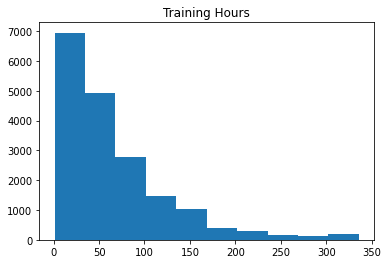

In [63]:
plt.hist(data.training_hours)
plt.title("Training Hours")
# As we can see, most of the training hours are within 100 hours

Text(0.5, 1.0, 'Training Hours for Target=1')

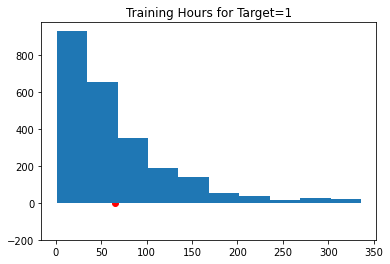

In [64]:
# Histogram when target = 1
plt.scatter(data[data.target == 1].training_hours.mean(), 0, color='red')
plt.hist(data[data.target == 1].training_hours)
plt.ylim(-200)
plt.title("Training Hours for Target=1")



Text(0.5, 1.0, 'Training Hours for Target=0')

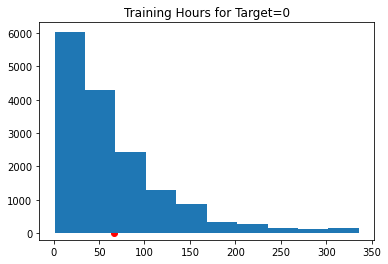

In [65]:
# Histogram when target = 0
plt.scatter(data[data.target == 0].training_hours.mean(), 0, color='red')
plt.hist(data[data.target == 0].training_hours)
plt.ylim(-200)
plt.title("Training Hours for Target=0")


## KDE Plot
For Univariate analysis of continuous variables

In [78]:
mean_th = data.training_hours.mean()
median_th = data.training_hours.median()
stddev_spread_th = data.training_hours.mean() - data.training_hours.std(), data.training_hours.std()+ data.training_hours.mean()

mean_th, median_th, stddev_spread_th

(65.89901410752219, 47.0, (5.013714067326916, 126.78431414771747))

c:\Users\Neelam\Desktop\Desktop\Python\Video\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(-0.002, 0.01232800629841172)

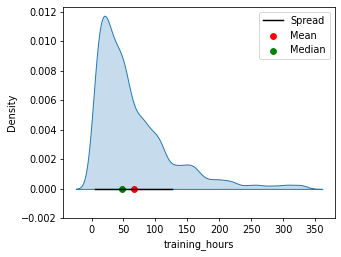

In [86]:
plt.figure(dpi=70, figsize=[5,4])
sns.kdeplot(data.training_hours, shade=True)
plt.scatter(mean_th, 0, color='red', label = "Mean")
plt.scatter(median_th, 0, color="Green", label = "Median")
sns.lineplot(stddev_spread_th, [0,0], color='black', label='Spread')
plt.legend()
plt.ylim(-0.002)

Skewness -  1.813029816790741
Kurtosis -  3.7459682666467153


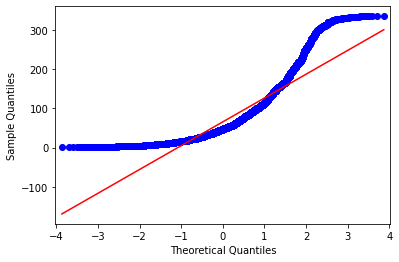

In [97]:
# QQ Plot

print('Skewness - ', data.training_hours.skew())
print('Kurtosis - ', data.training_hours.kurtosis())
sm.qqplot(data.training_hours, line='s')
plt.show()

In [130]:
# Check when Std deviation is in factor of 3
factor = 3

th_data = data

th_data_1 = th_data[th_data['training_hours'] < factor*th_data['training_hours'].std()]

In [131]:
th_data.shape, th_data_1.shape


((18359, 14), (17343, 14))

Skewness -  0.9863826313247012
Kurtosis -  0.24610160181687935


(-0.002, 0.013684711632794977)

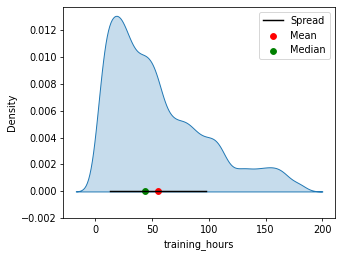

In [132]:
mean_th_1 = th_data_1.training_hours.mean()
median_th_1 = th_data_1.training_hours.median()
stddev_spread_th_1 = th_data_1.training_hours.mean() - th_data_1.training_hours.std(), th_data_1.training_hours.std()+ th_data_1.training_hours.mean()


print('Skewness - ', th_data_1.training_hours.skew())
print('Kurtosis - ', th_data_1.training_hours.kurtosis())

plt.figure(dpi=70, figsize=[5,4])
sns.kdeplot(th_data_1.training_hours, shade=True)
plt.scatter(mean_th_1, 0, color='red', label = "Mean")
plt.scatter(median_th_1, 0, color="Green", label = "Median")
sns.lineplot(stddev_spread_th_1, [0,0], color='black', label='Spread')

plt.legend()
plt.ylim(-0.002)

Skewness after 3 factor removal -  0.9863826313247012
Kurtosis after 3 factor removal -  0.24610160181687935
Skewness -  1.813029816790741
Kurtosis -  3.7459682666467153


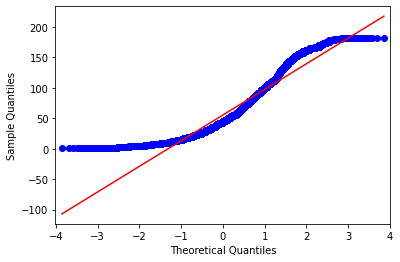

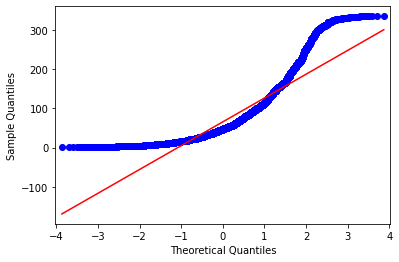

In [133]:
print('Skewness after 3 factor removal - ', th_data_1.training_hours.skew())
print('Kurtosis after 3 factor removal - ', th_data_1.training_hours.kurtosis())

sm.qqplot(th_data_1.training_hours, line='s')

print('Skewness - ', data.training_hours.skew())
print('Kurtosis - ', data.training_hours.kurtosis())

sm.qqplot(data.training_hours, line='s')


plt.show()